# Prediction with Regression

An important aspect of data science is to find out what data can tell us about the future. What do data about climate and pollution say about temperatures a few decades from now? Based on a person's internet profile, which websites are likely to interest them? How can a patient's medical history be used to judge how well he or she will respond to a treatment?

To answer such questions, data scientists have developed methods for making *predictions*. In this chapter we will study one of the most commonly used ways of predicting the value of one variable based on the value of another.

In [1]:
path_data = '../../data/'

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

Here is a historical dataset used for the prediction of the heights of adults based on the heights of their parents. We have studied this dataset in an earlier section. The table `heights` contains data on the midparent height and child's height (all in inches) for a population of 934 adult "children". Recall that the midparent height is an average of the heights of the two parents.

In [7]:
### data on heights of parents and their adult children

original = pd.read_csv(path_data + 'family_heights.csv')
heights = pd.DataFrame({
    'MidParent': original['midparentHeight'],
    'Child': original['childHeight']
})

In [8]:
heights

MidParent  Child
0        75.43   73.2
1        75.43   69.2
2        75.43   69.0
3        75.43   69.0
4        73.66   73.5
..         ...    ...
929      66.64   64.0
930      66.64   62.0
931      66.64   61.0
932      65.27   66.5
933      65.27   57.0

[934 rows x 2 columns]

<Axes: xlabel='MidParent', ylabel='Child'>

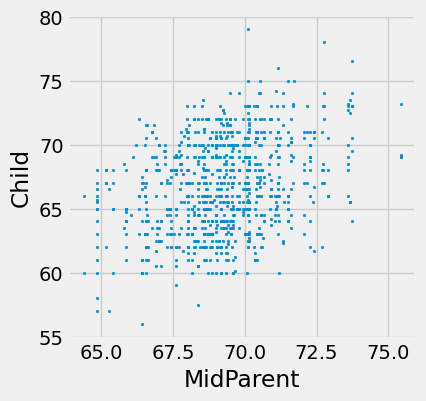

In [9]:
heights.plot('MidParent', 'Child', kind='scatter', figsize=(4,4), s=3)

A primary reason for studying the data was to be able to predict the adult height of a child born to parents who were similar to those in the dataset. We made these predictions in Section 8.1, after noticing the positive association between the two variables. 

Our approach was to base the prediction on all the points that correspond to a midparent height of around the midparent height of the new person. To do this, we wrote a function called `predict_child` which takes a midparent height as its argument and returns the average height of all the children who had midparent heights within half an inch of the argument.

In [11]:
def predict_child(mpht, heights):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights[
        (heights['MidParent'] >= mpht - 0.5) &
        (heights['MidParent'] <= mpht + 0.5)
    ]
    return close_points['Child'].mean()                       

We applied the function to the column of `Midparent` heights, and visualized the result.

In [12]:
### apply predict_child to all the midparent heights

### apply predict_child() to every value in the 'MidParent' column
heights_with_predictions = heights.copy()
heights_with_predictions['Prediction'] = heights_with_predictions['MidParent'].apply(
    lambda x: predict_child(x, heights)
)


Text(0.5, 0, 'MidParent')

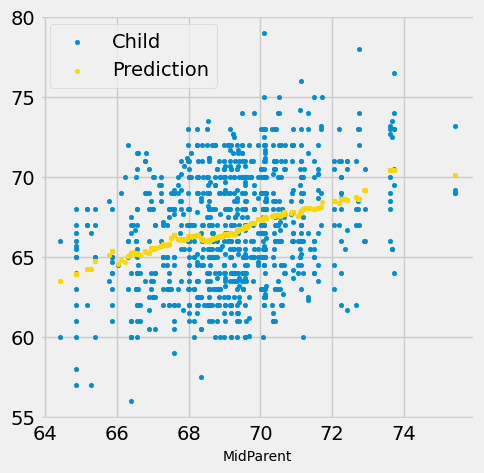

In [14]:
# Draw the original scatter plot along with the predicted values

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(heights_with_predictions['MidParent'], heights_with_predictions['Child'], s=10, label="Child")
ax.scatter(heights_with_predictions['MidParent'], heights_with_predictions['Prediction'], s=10, color="gold", label="Prediction")
ax.legend()
ax.set_xlabel('MidParent', fontsize=10)

The prediction at a given midparent height lies roughly at the center of the vertical strip of points at the given height. This method of prediction is called *regression.* Later in this chapter we will see whether we can avoid our arbitrary definitions of "closeness" being "within 0.5 inches". But first we will develop a measure that can be used in many settings to decide how good one variable will be as a predictor of another.